In [189]:
import pandas as pd
df = pd.read_csv("INTC.csv")


In [190]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.197055,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.195479,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.200208,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.199420,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.192325,12172800
...,...,...,...,...,...,...,...
10481,2021-10-08,54.549999,54.580002,53.700001,53.810001,53.810001,16064100
10482,2021-10-11,53.810001,54.410000,53.419998,53.439999,53.439999,14398800
10483,2021-10-12,53.570000,53.720001,52.009998,52.169998,52.169998,32784300
10484,2021-10-13,52.380001,52.580002,51.869999,52.259998,52.259998,18534000


In [191]:
Stocksfrom2018 = df[(df['Date']>'2018-1-1') & (df['Date']<'2021-3-1')] 

In [192]:
Stocksfrom2018

,Date,Open,High,Low,Close,Adj Close,Volume
9720,2018-10-01,46.790001,47.220001,46.200001,46.450001,43.130531,23796200
9721,2018-10-02,47.509998,48.880001,47.320000,48.099998,44.662601,42121100
9722,2018-10-03,48.619999,49.720001,48.560001,48.759998,45.275440,39211900
9723,2018-10-04,48.840000,48.860001,47.619999,48.130001,44.690468,30108300
9724,2018-10-05,48.230000,48.340000,46.660000,47.029999,43.669079,28901400
...,...,...,...,...,...,...,...
10481,2021-10-08,54.549999,54.580002,53.700001,53.810001,53.810001,16064100
10482,2021-10-11,53.810001,54.410000,53.419998,53.439999,53.439999,14398800
10483,2021-10-12,53.570000,53.720001,52.009998,52.169998,52.169998,32784300
10484,2021-10-13,52.380001,52.580002,51.869999,52.259998,52.259998,18534000


In [193]:
dates = ["2022-12-23", "2023-02-24", "2024-05-25", "2025-08-26", "2030-01-27",]
#convert to time stamp
for dt in dates:
  np.append(Stocksfrom2018['Date'], dt)

In [194]:
Stocksfrom2018

,Date,Open,High,Low,Close,Adj Close,Volume
9720,2018-10-01,46.790001,47.220001,46.200001,46.450001,43.130531,23796200
9721,2018-10-02,47.509998,48.880001,47.320000,48.099998,44.662601,42121100
9722,2018-10-03,48.619999,49.720001,48.560001,48.759998,45.275440,39211900
9723,2018-10-04,48.840000,48.860001,47.619999,48.130001,44.690468,30108300
9724,2018-10-05,48.230000,48.340000,46.660000,47.029999,43.669079,28901400
...,...,...,...,...,...,...,...
10481,2021-10-08,54.549999,54.580002,53.700001,53.810001,53.810001,16064100
10482,2021-10-11,53.810001,54.410000,53.419998,53.439999,53.439999,14398800
10483,2021-10-12,53.570000,53.720001,52.009998,52.169998,52.169998,32784300
10484,2021-10-13,52.380001,52.580002,51.869999,52.259998,52.259998,18534000


In [195]:
Stocksfrom2018.set_index('Date', inplace=True)

In [196]:
from sklearn.model_selection import train_test_split

prices = Stocksfrom2018[Stocksfrom2018.columns[0:1]]
prices.reset_index(level=0, inplace=True)
prices["timestamp"] = pd.to_datetime(prices.Date).astype(int) // (10**9)
prices = prices.drop(['Date'], axis=1)
prices

dataset = prices.values
X = dataset[:,1].reshape(-1,1)
Y = dataset[:,0:1]

validation_size = 0.15
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [197]:
X

array([[1.5383520e+09],
       [1.5384384e+09],
       [1.5385248e+09],
       [1.5386112e+09],
       [1.5386976e+09],
       [1.5389568e+09],
       [1.5390432e+09],
       [1.5391296e+09],
       [1.5392160e+09],
       [1.5393024e+09],
       [1.5395616e+09],
       [1.5396480e+09],
       [1.5397344e+09],
       [1.5398208e+09],
       [1.5399072e+09],
       [1.5401664e+09],
       [1.5402528e+09],
       [1.5403392e+09],
       [1.5404256e+09],
       [1.5405120e+09],
       [1.5407712e+09],
       [1.5408576e+09],
       [1.5409440e+09],
       [1.5410304e+09],
       [1.5411168e+09],
       [1.5413760e+09],
       [1.5414624e+09],
       [1.5415488e+09],
       [1.5416352e+09],
       [1.5417216e+09],
       [1.5419808e+09],
       [1.5420672e+09],
       [1.5421536e+09],
       [1.5422400e+09],
       [1.5423264e+09],
       [1.5425856e+09],
       [1.5426720e+09],
       [1.5427584e+09],
       [1.5429312e+09],
       [1.5431904e+09],
       [1.5432768e+09],
       [1.543363

In [198]:
#Training the model
# Linear Regression (LR)
# Lasso (LASSO)
# Elastic Net (EN)
# KNN (K-Nearest Neighbors)
# CART (Classification and Regression Trees)
# SVR (Support Vector Regression)

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [200]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.166921 (0.084090)
 LASSO : 0.166921 (0.084090)
 EN : 0.166921 (0.084090)
 KNN : 0.958735 (0.017555)
 CART : 0.949509 (0.024058)
 SVR : -0.022080 (0.024555)


/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'aut

In [201]:
X

array([[1.5383520e+09],
       [1.5384384e+09],
       [1.5385248e+09],
       [1.5386112e+09],
       [1.5386976e+09],
       [1.5389568e+09],
       [1.5390432e+09],
       [1.5391296e+09],
       [1.5392160e+09],
       [1.5393024e+09],
       [1.5395616e+09],
       [1.5396480e+09],
       [1.5397344e+09],
       [1.5398208e+09],
       [1.5399072e+09],
       [1.5401664e+09],
       [1.5402528e+09],
       [1.5403392e+09],
       [1.5404256e+09],
       [1.5405120e+09],
       [1.5407712e+09],
       [1.5408576e+09],
       [1.5409440e+09],
       [1.5410304e+09],
       [1.5411168e+09],
       [1.5413760e+09],
       [1.5414624e+09],
       [1.5415488e+09],
       [1.5416352e+09],
       [1.5417216e+09],
       [1.5419808e+09],
       [1.5420672e+09],
       [1.5421536e+09],
       [1.5422400e+09],
       [1.5423264e+09],
       [1.5425856e+09],
       [1.5426720e+09],
       [1.5427584e+09],
       [1.5429312e+09],
       [1.5431904e+09],
       [1.5432768e+09],
       [1.543363

In [209]:
# Future prediction, add dates here for which you want to predict
dates = ["2021-12-23", "2022-12-24", "2023-12-25", "2024-12-26", "2025-12-27",]
#convert to time stamp
for dt in dates:
  datetime_object = datetime.strptime(dt, "%Y-%m-%d")
  timestamp = datetime.timestamp(datetime_object)
  # to array X
  print(int(timestamp))
  np.append(X, int(timestamp))

1640214000
1671836400
1703458800
1735167600
1766790000


In [210]:
X

array([[1.5383520e+09],
       [1.5384384e+09],
       [1.5385248e+09],
       [1.5386112e+09],
       [1.5386976e+09],
       [1.5389568e+09],
       [1.5390432e+09],
       [1.5391296e+09],
       [1.5392160e+09],
       [1.5393024e+09],
       [1.5395616e+09],
       [1.5396480e+09],
       [1.5397344e+09],
       [1.5398208e+09],
       [1.5399072e+09],
       [1.5401664e+09],
       [1.5402528e+09],
       [1.5403392e+09],
       [1.5404256e+09],
       [1.5405120e+09],
       [1.5407712e+09],
       [1.5408576e+09],
       [1.5409440e+09],
       [1.5410304e+09],
       [1.5411168e+09],
       [1.5413760e+09],
       [1.5414624e+09],
       [1.5415488e+09],
       [1.5416352e+09],
       [1.5417216e+09],
       [1.5419808e+09],
       [1.5420672e+09],
       [1.5421536e+09],
       [1.5422400e+09],
       [1.5423264e+09],
       [1.5425856e+09],
       [1.5426720e+09],
       [1.5427584e+09],
       [1.5429312e+09],
       [1.5431904e+09],
       [1.5432768e+09],
       [1.543363

0.11597487725893092


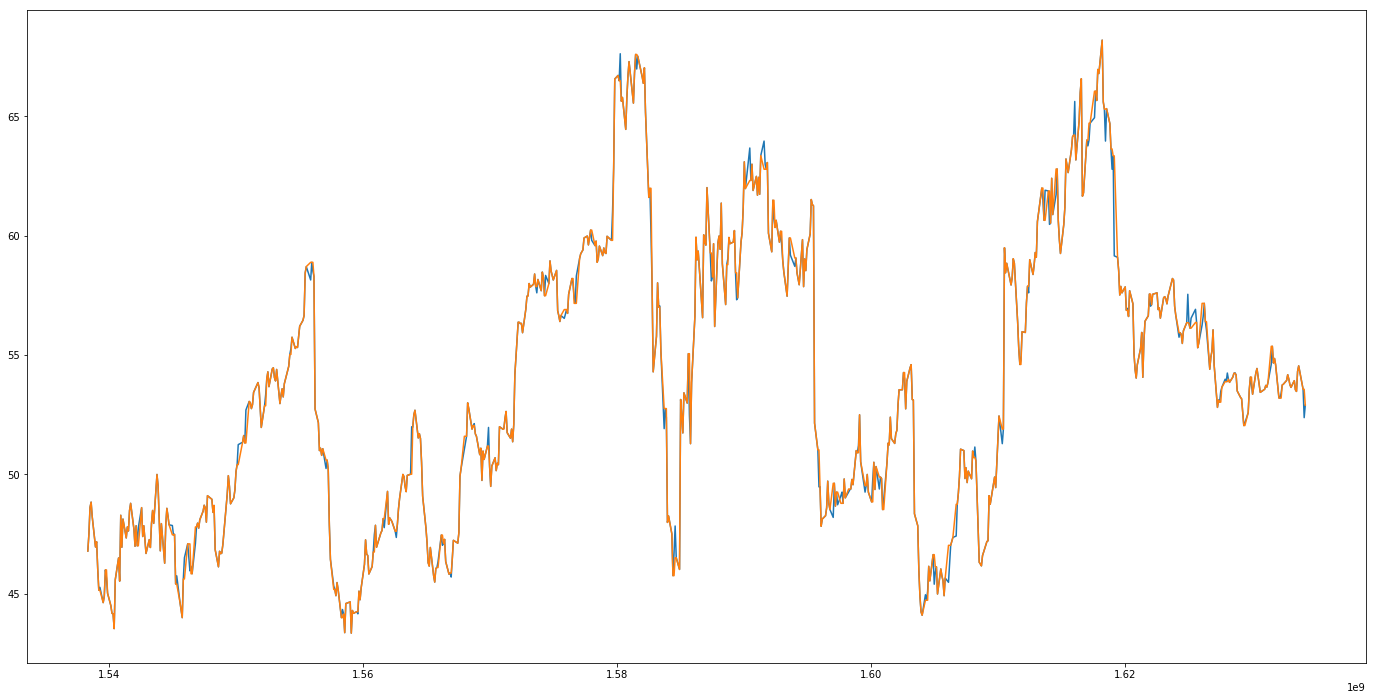

In [203]:
# Define the model
# Fit data into our model
# Make predictions

# Future prediction, add dates here for which you want to predict
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Define model
model = DecisionTreeRegressor()
# Fit to model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X)
print(mean_squared_error(Y, predictions))

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.show()

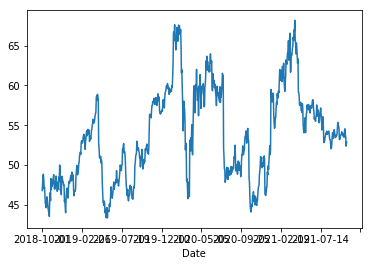

In [155]:
Stocksfrom2018['Open'].plot()